In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.signal import find_peaks, peak_prominences
import glob
from scipy.optimize import curve_fit
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [20]:
########## Calibration for incident angle
calibration_file = 'air-calibration-p-03-17-2025.csv'
df0 = pd.read_csv(calibration_file)
def func(x,m,c):
    return (m*x)+c
popt, pcov = curve_fit(func, df0['Stage'].to_numpy(), df0['Angle'].to_numpy())

Text(0.5, 1.0, 'Stage position vs angle of incidence')

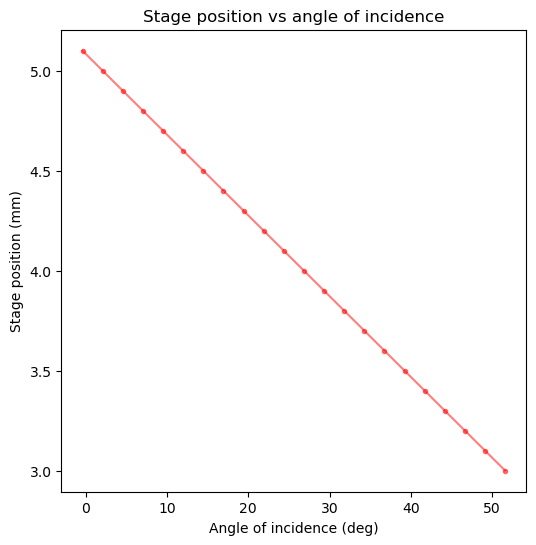

In [21]:
pos = np.arange(3.0, 5.2, 0.1)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.plot(func(pos,*popt), pos, 'r.-', alpha=0.5, label='Fit')
plt.ylabel('Stage position (mm)')
plt.xlabel('Angle of incidence (deg)')
plt.title('Stage position vs angle of incidence')
# plt.savefig("air-calib.pdf", transparent=True)

In [22]:
# Display as a dataframe 
df = pd.DataFrame()
df['Angles'] = func(pos,*popt)
df['Stage'] = pos

In [23]:
def func2(y,m2,c2):
    return (y-c2)/m2

In [24]:
# func(np.array([3.7]),*popt)
# print(popt[1])

angles = np.arange(0,65,2)
print('Angles : ', angles)
stage_positions = func2(angles,popt[0],popt[1])
print('Stage positions : ', stage_positions)
brewsters_angle = 33.4349
critical_angle = 41.4718

Angles :  [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50 52 54 56 58 60 62 64]
Stage positions :  [5.08396063 5.00323685 4.92251306 4.84178928 4.7610655  4.68034171
 4.59961793 4.51889415 4.43817037 4.35744658 4.2767228  4.19599902
 4.11527524 4.03455145 3.95382767 3.87310389 3.7923801  3.71165632
 3.63093254 3.55020876 3.46948497 3.38876119 3.30803741 3.22731363
 3.14658984 3.06586606 2.98514228 2.90441849 2.82369471 2.74297093
 2.66224715 2.58152336 2.50079958]


In [25]:
new_angles = np.sort(np.append(angles,[brewsters_angle, critical_angle, 22.0, 23.0, 24.0, 31.0, 43.0, 44.0, 8.0, 38.0, ]))
print(new_angles)
new_stage_positions = func2(new_angles,popt[0],popt[1])
print(new_stage_positions)
print(np.round(new_stage_positions,4))

[ 0.      2.      4.      6.      8.      8.     10.     12.     14.
 16.     18.     20.     22.     22.     23.     24.     24.     26.
 28.     30.     31.     32.     33.4349 34.     36.     38.     38.
 40.     41.4718 42.     43.     44.     44.     46.     48.     50.
 52.     54.     56.     58.     60.     62.     64.    ]
[5.08396063 5.00323685 4.92251306 4.84178928 4.7610655  4.7610655
 4.68034171 4.59961793 4.51889415 4.43817037 4.35744658 4.2767228
 4.19599902 4.19599902 4.15563713 4.11527524 4.11527524 4.03455145
 3.95382767 3.87310389 3.832742   3.7923801  3.73446483 3.71165632
 3.63093254 3.55020876 3.55020876 3.46948497 3.41008034 3.38876119
 3.3483993  3.30803741 3.30803741 3.22731363 3.14658984 3.06586606
 2.98514228 2.90441849 2.82369471 2.74297093 2.66224715 2.58152336
 2.50079958]
[5.084  5.0032 4.9225 4.8418 4.7611 4.7611 4.6803 4.5996 4.5189 4.4382
 4.3574 4.2767 4.196  4.196  4.1556 4.1153 4.1153 4.0346 3.9538 3.8731
 3.8327 3.7924 3.7345 3.7117 3.6309 3.5502 3

In [26]:
df5 = pd.DataFrame()
df5['Angles'] = new_angles
df5['Stage'] = np.round(new_stage_positions,4)
df5.to_csv('precise_angles_03-17-2025.csv', index=False)